# Telecom Customer Churn Analysis

Customer Churn is one of the most important metrics for a business to track. Customer acquisition costs are a massive factor in scaling. Ultimately a successful business model will hinge upon preventing customer churn.

☔


Data Analysis and Machine Learning are exceptional tools for understanding Churn. Data Analysis aids in understanding trends while machine learning enables the creation of predictive models. By combining these tools with strategic data collection a business model can be iteratively updated to ensure continuous revenue growth and scalability.

## Exploratory Data Analysis and Visualization

### Wrangling

Our first steps are to ingest the data, gain an understanding of its structure, and the distribution of its values

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
telecom_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

#### Columns

In [6]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Values

In [8]:
unique_values = telecom_data.apply(lambda col: col.unique())

unique_values = pd.DataFrame(unique_values)

unique_values

,0
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,"[Female, Male]"
SeniorCitizen,"[0, 1]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"


In [9]:
telecom_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Currently there are no null values in the data, but some of the data is of the wrong type which we will need correct in order to perform regression. I will also drop Custumer ID because it is not a feature related to Churn. I suspect that the variables 'PhoneService' and 'MultipleLines' are confounding. During regression analysis I may have to address multicollinearity.

---

In [10]:
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')

In [11]:
telecom_data['SeniorCitizen'] = telecom_data['SeniorCitizen'].astype(object).replace({0:'No', 1: 'Yes'})

In [12]:
telecom_data.drop(columns = 'customerID', inplace=True)

In [13]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
telecom_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
telecom_data.loc[telecom_data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The data wrangling process has created some Null values, after inspecting them we can see other issues with these entries as well. For instance the customer's have monthly charges but no tenure. Is this their first month with the service? I will inspect what other customer's have a tenure of 0 months.

In [16]:
telecom_data.loc[telecom_data['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It appears they are all the same customer. I could impute the values using the mean of 'TotalCharges' or a classification algorithm, though in this situation it makes the most sense to just replace 'TotalCharges' with 0 as I believe they are first month customers.

In [17]:
telecom_data['TotalCharges'].fillna(0, inplace=True)

Now that the data has the correct variable types and there are no null values, I will separate the label and the features by type. I also want to standardize the naming of the variables.

In [18]:
telecom_data.columns = telecom_data.columns.str.capitalize()
telecom_data.columns

Index(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity',
       'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv',
       'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod',
       'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')

In [19]:
label = 'Churn'
categorical_features = []
numerical_features = []

for column in telecom_data.columns:
    if column == label:
        pass
    elif telecom_data[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)
print("Label:", label)

Categorical features: ['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod']
Numerical features: ['Tenure', 'Monthlycharges', 'Totalcharges']
Label: Churn


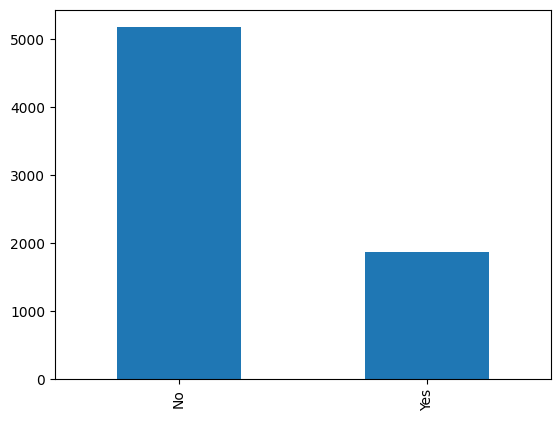

In [20]:
telecom_data[label].value_counts().plot(kind='bar')
plt.show()

In [21]:
churn_percentage = (telecom_data['Churn'].value_counts(normalize=True)* 100)['Yes']
print(f"Churn Percentage: {churn_percentage:.2f}%")

Churn Percentage: 26.54%




Over 25% of customers have churned, this is much higher than we would like. I will now examine and visualize the features of this dataset to see if there are features that are causing this churn rate to be so high.

---


### Visualization

#### Categorical Data

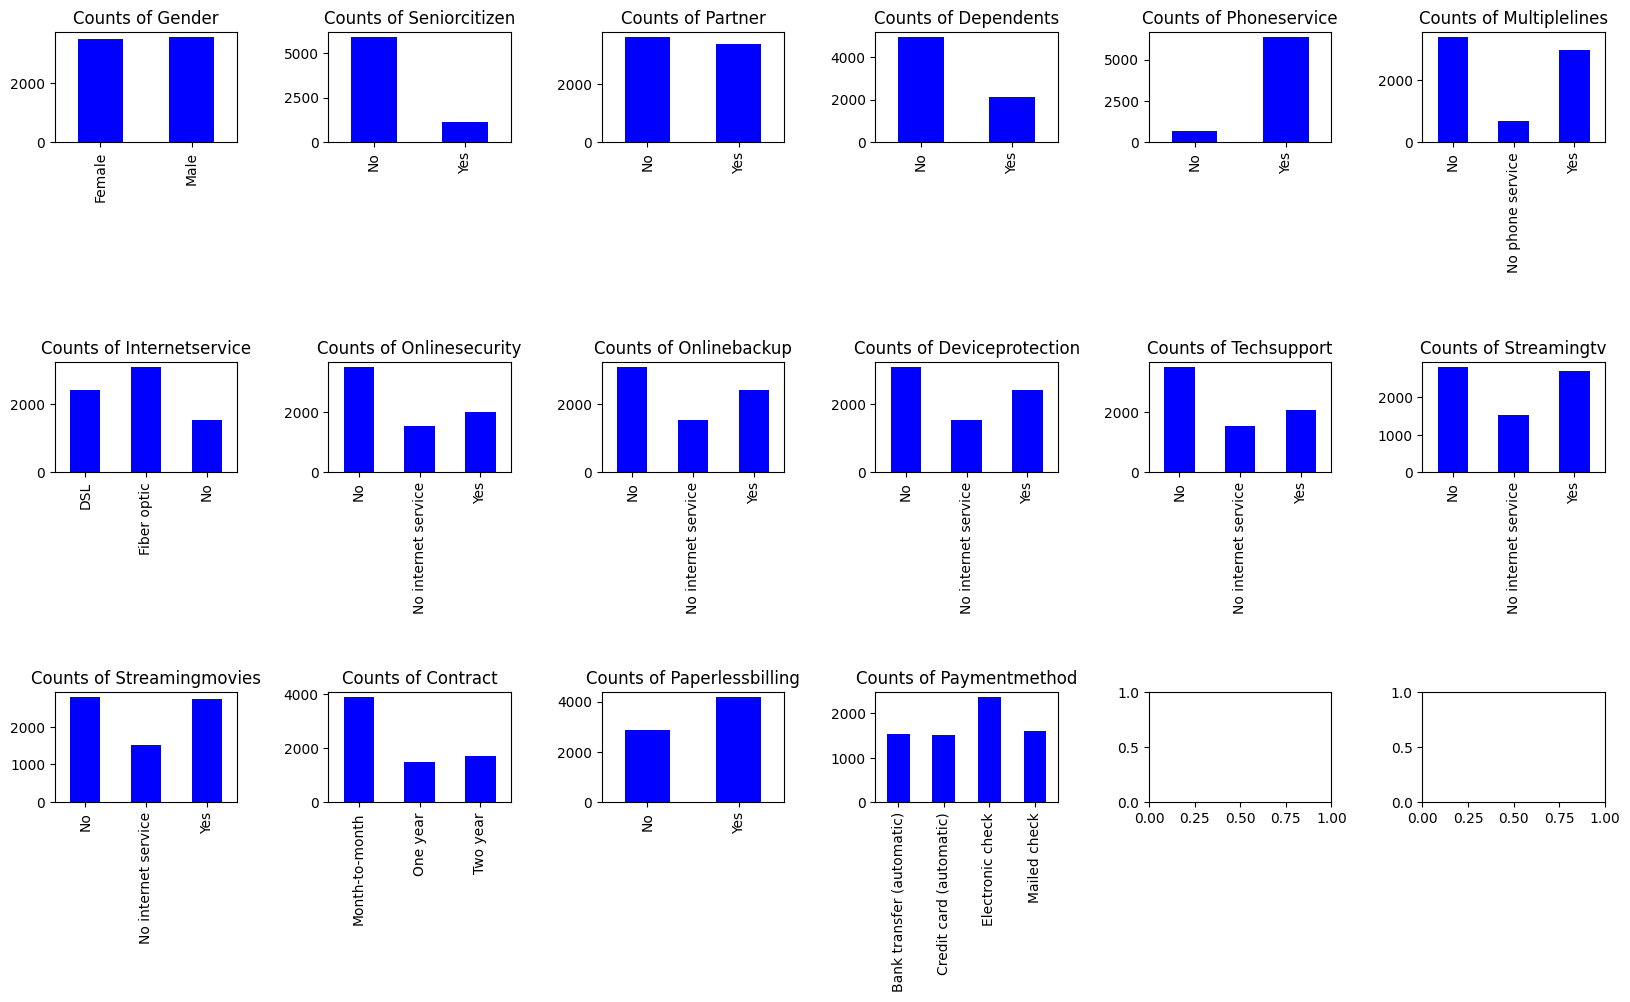

In [22]:
fig, axes = plt.subplots(3,6, figsize=(20, 10), gridspec_kw={'wspace': 0.5, 'hspace':2})
axes = axes.flatten()

# Plot counts for each categorical feature
for i, column in enumerate(categorical_features):
    telecom_data[column].value_counts().sort_index().plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Counts of {column}')

plt.show()

##### Key Takeaways

  * Gender is equally distributed
  * The majority of customers are not seniors
  * Most members have phone and internet service
  * Most customers have a month-month contract

#### Numerical Data

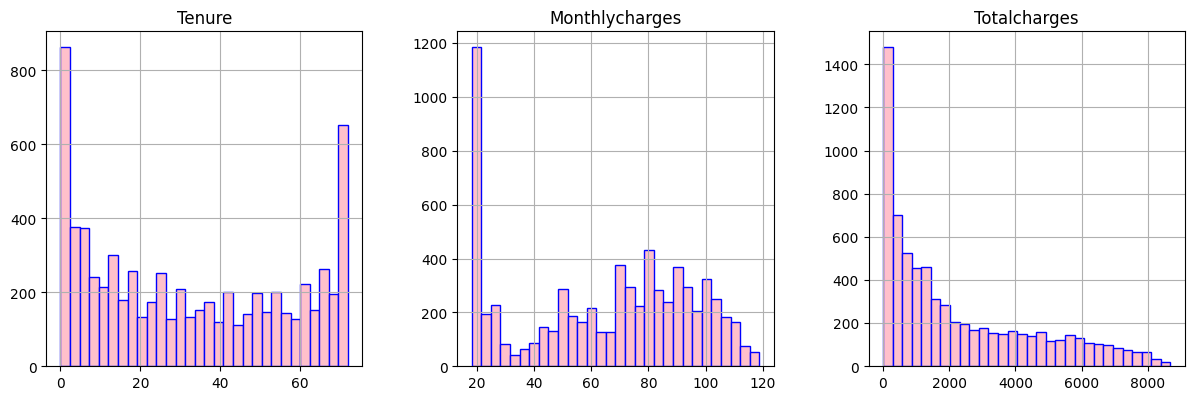

In [23]:
telecom_data[numerical_features].hist(color = 'pink', edgecolor='blue', bins=30,
                            figsize = (20,10), layout=(2,4))
plt.show()

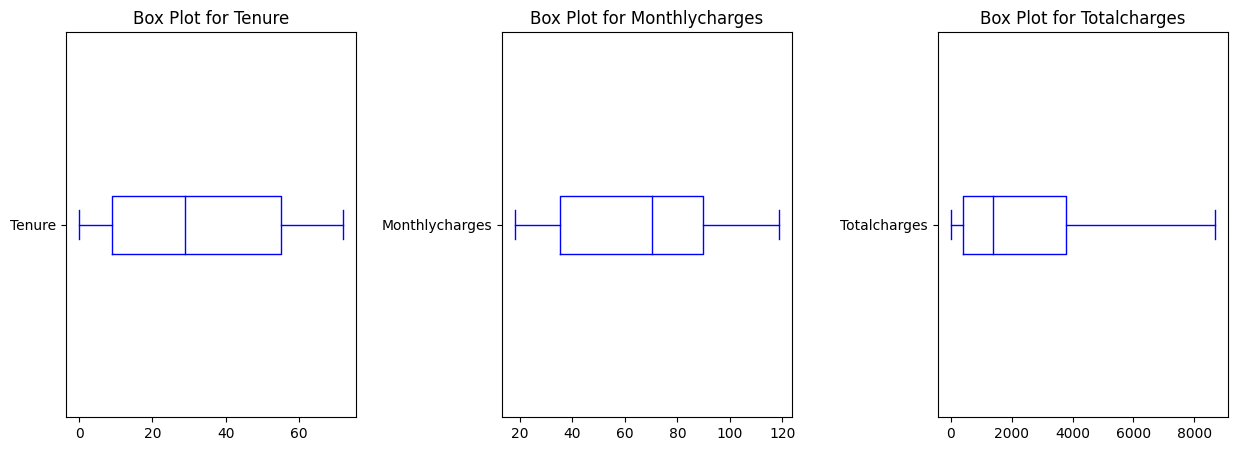

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'wspace': 0.5})

# Plot each numerical feature in a separate subplot
for i, feature in enumerate(numerical_features):
    telecom_data[feature].plot(kind='box', vert=False, ax=axes[i], color= 'blue')
    axes[i].set_title(f'Box Plot for {feature}')

plt.show()


In [25]:
telecom_data[numerical_features].describe()

,Tenure,Monthlycharges,Totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [26]:
telecom_data.groupby(['Churn']).agg({'Monthlycharges': 'mean', 'Totalcharges': 'mean', 'Tenure': 'mean'})

,Monthlycharges,Totalcharges,Tenure
Churn,,,
No,61.265124,2549.911442,37.569965
Yes,74.441332,1531.796094,17.979133


##### Key Takeaways

  * The average customer pays $65 a month for service
   * They have been customers for 30 months
  * The second highest category of all customers is those who have over 60 months of tenure
  * Customers that churn pay slightly more a month on average
    * Because they churn this reduces their total charges
  * The average churning customer will have service for 17 months

#### Relationship Between Numeric Variables

In [27]:
telecom_data.corr(numeric_only=True)

,Tenure,Monthlycharges,Totalcharges
Tenure,1.000000,0.247900,0.826178
Monthlycharges,0.247900,1.000000,0.651174
Totalcharges,0.826178,0.651174,1.000000


This is straightforward, Total Charges is highly correlated with Monthly Charges and Tenure

#### Relationship Between Categorical Variables

In [28]:
table_cnt = telecom_data.groupby(['Churn', 'Internetservice']).\
agg(cnt = ('Gender', lambda x: len(x)))
print(table_cnt)

                        cnt
Churn Internetservice      
No    DSL              1962
      Fiber optic      1799
      No               1413
Yes   DSL               459
      Fiber optic      1297
      No                113


In [29]:
table_cnt = telecom_data.groupby(['Churn', 'Seniorcitizen']).\
agg(cnt = ('Gender', lambda x: len(x)))
print(table_cnt)

                      cnt
Churn Seniorcitizen      
No    No             4508
      Yes             666
Yes   No             1393
      Yes             476


Because most of our data is categorical we will move onto **training a model**.

This will move the problem forward in two ways:

  1. Creating a model which can be used on future data
  2. Training a model to identify which features are most important in predicting churn

## Machine Learning

### Model Training and Evaluation

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import make_column_transformer

# categories

category_transformer = make_column_transformer(
    #(OneHotEncoder(drop='first'), categorical_features))
    (OneHotEncoder(), categorical_features))

category_transformed = category_transformer.fit_transform(telecom_data[categorical_features])

ohe_df = pd.DataFrame(category_transformed, columns=category_transformer.get_feature_names_out(categorical_features))

# numerical

numerical_transformer = make_column_transformer(
    (StandardScaler(), numerical_features))

numerical_transformed = numerical_transformer.fit_transform(telecom_data[numerical_features])

scaled_df = pd.DataFrame(numerical_transformed, columns=numerical_transformer.get_feature_names_out(numerical_features))

# join dataframes

transformed_df = ohe_df.join(scaled_df)

# label

le = LabelEncoder()
label_df = pd.DataFrame(le.fit_transform(telecom_data[label]), columns = [label])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(transformed_df, label_df, test_size=0.25, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression:", accuracy_logistic)

# Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy of Random Forest:", accuracy_random_forest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-31-7b492f6ea878>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, 

Accuracy of Logistic Regression: 0.8126064735945485
Accuracy of Random Forest: 0.787052810902896


Accuracy: 0.8126064735945485
Precision: 0.6839506172839506
Recall: 0.5782881002087683


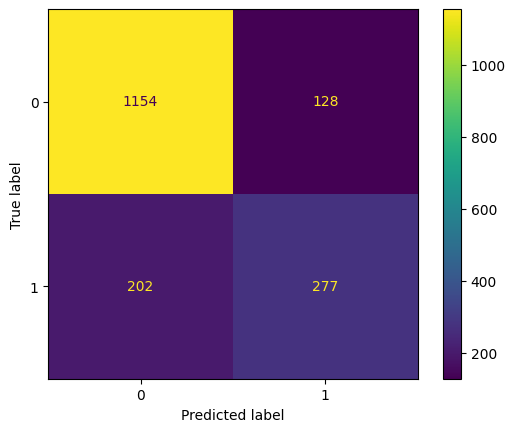

In [32]:
cm = confusion_matrix(y_test, y_pred_logistic)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

lgc_accuracy = accuracy_score(y_test, y_pred_logistic)
lgc_precision = precision_score(y_test, y_pred_logistic)
lgc_recall = recall_score(y_test, y_pred_logistic)

print("Accuracy:", lgc_accuracy)
print("Precision:", lgc_precision)
print("Recall:", lgc_recall)

Accuracy: 0.787052810902896
Precision: 0.6595092024539877
Recall: 0.4488517745302714


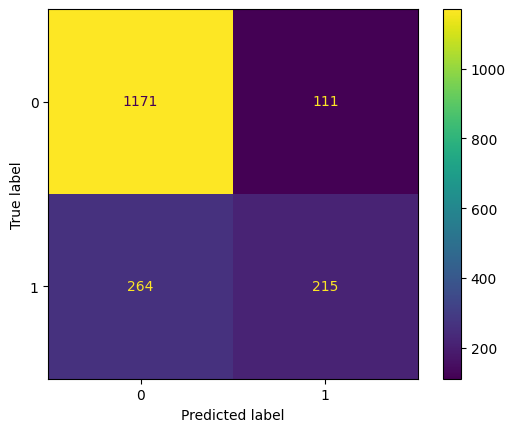

In [33]:
cm = confusion_matrix(y_test, y_pred_random_forest)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

rndf_accuracy = accuracy_score(y_test, y_pred_random_forest)
rndf_precision = precision_score(y_test, y_pred_random_forest)
rndf_recall = recall_score(y_test, y_pred_random_forest)

print("Accuracy:", rndf_accuracy)
print("Precision:", rndf_precision)
print("Recall:", rndf_recall)

<Axes: >

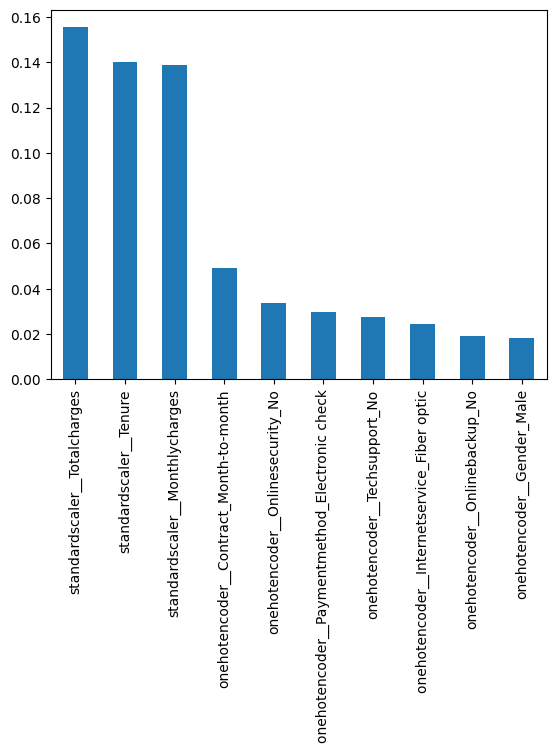

In [34]:
# Feature importance
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances = feature_importances[:10]

feature_importances.plot.bar()

### Oversampling Technique

Because Churn is imbalanced, the accuracy of the model can be improved by synthetically oversampling the minority value.

<Axes: xlabel='Churn', ylabel='count'>

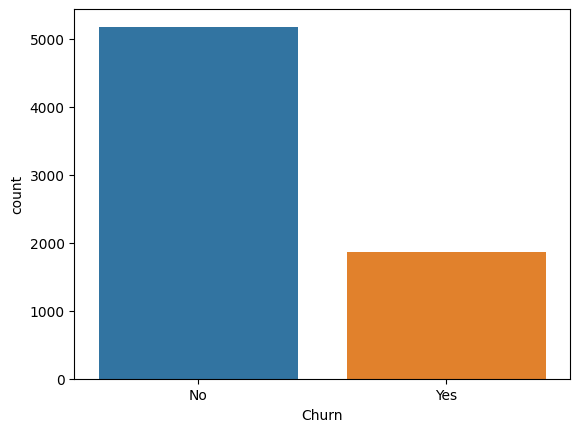

In [35]:
sns.countplot(x = telecom_data[label])

In [36]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(transformed_df,label_df)

<Axes: xlabel='Churn', ylabel='count'>

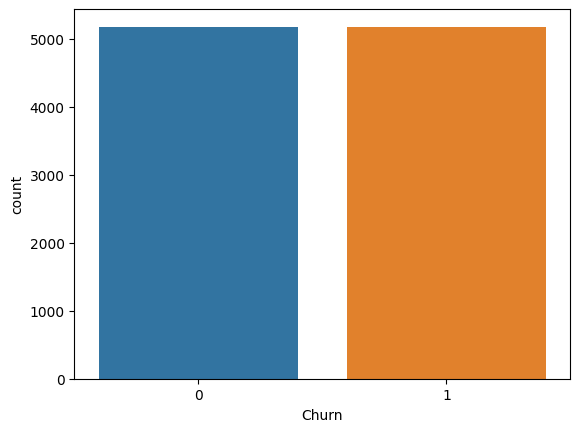

In [37]:
sns.countplot(x = y_res['Churn'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

# Logistic Regression Model
smote_logistic_model = LogisticRegression()
smote_logistic_model.fit(X_train, y_train)
y_pred_smote_logistic = smote_logistic_model.predict(X_test)
accuracy_smote_logistic = accuracy_score(y_test, y_pred_smote_logistic)
print("Accuracy of Logistic Regression:", accuracy_smote_logistic)

# Random Forest Model
smote_random_forest_model = RandomForestClassifier(n_estimators=100)
smote_random_forest_model.fit(X_train, y_train)
y_pred_smote_random_forest = smote_random_forest_model.predict(X_test)
accuracy_smote_random_forest = accuracy_score(y_test, y_pred_smote_random_forest)
print("Accuracy of Random Forest:", accuracy_smote_random_forest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression: 0.7943563973714728


<ipython-input-38-6e0fe16d0ab6>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  smote_random_forest_model.fit(X_train, y_train)


Accuracy of Random Forest: 0.8565906455353691


Accuracy: 0.8565906455353691
Precision: 0.86198738170347
Recall: 0.847944142746315


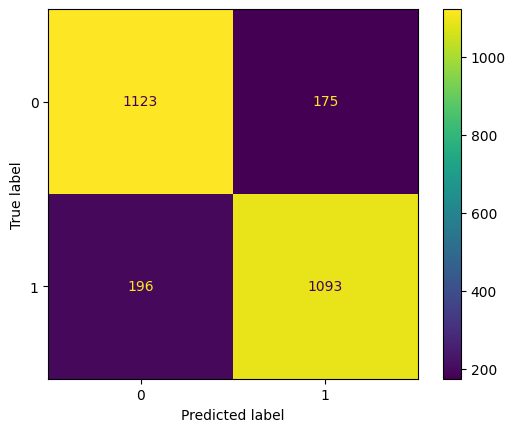

In [39]:
cm = confusion_matrix(y_test, y_pred_smote_random_forest)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

smote_rndf_accuracy = accuracy_score(y_test, y_pred_smote_random_forest)
smote_rndf_precision = precision_score(y_test, y_pred_smote_random_forest)
smote_rndf_recall = recall_score(y_test, y_pred_smote_random_forest)

print("Accuracy:", smote_rndf_accuracy)
print("Precision:", smote_rndf_precision)
print("Recall:", smote_rndf_recall)

<Axes: >

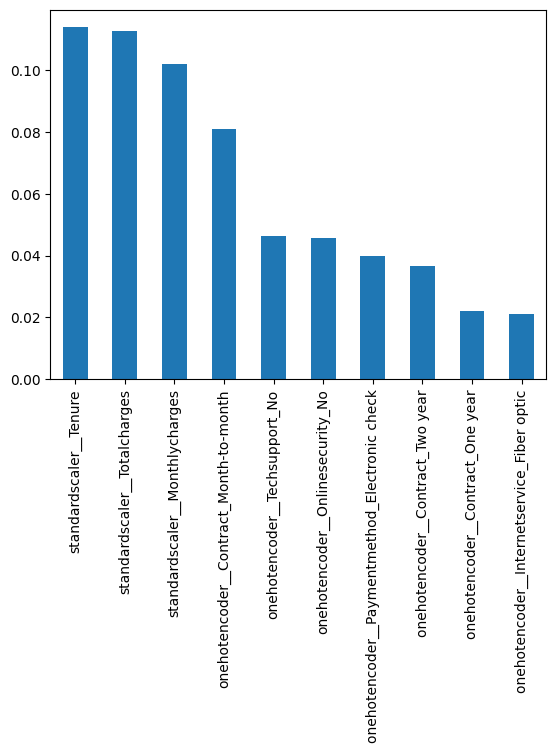

In [40]:
# Feature importance
feature_importances = pd.Series(smote_random_forest_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances = feature_importances[:10]

feature_importances.plot.bar()

## Conclusion

It should be no suprise that tenure is the most important feature for predicting churn, as churn directly affects tenure.

What is more important to recognize is that the month to month contract also predicts churn.

It is these customers that should be focused on as they are uncommitted and most likely to churn. The company should focus on keeping these customers past the average of 30 months.

The Random Forest Model which was trained using the minority oversampling technique can be used on future customers to predict their likelyhood of churning.